In [1]:
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#index_col='year_built',
df = pd.read_csv('data/properties.csv',  dtype={'census_tract': object} )

Split the coordinates column into lat long columns with some regex. Drop NaN cells and convert dtype to float64

In [2]:
df['lat'] = df['coordinates'].str.extract('(?<=\s)(\d+.\d+)', expand=True).dropna().astype(np.float64)
df['lon'] = df['coordinates'].str.extract('(\-\w+.\d*)', expand=True).dropna().astype(np.float64)

`dropna` does not seem to do so - I think I need to do that on each row rather than cell. Counting the number of NaN values in the `lon` column using `np.count_nonzero(np.isnan(df['lon']))` I can see there are 1305 missing values, small fry when set against the 580042 total values.

## Plotting a map.

In [3]:
from matplotlib import rcParams  
rcParams['figure.figsize'] = (17, 17) #Size of figure  
rcParams['figure.dpi'] = 250

plt.style.use('ggplot')

In [4]:
print(plt.style.available)

['seaborn-pastel', 'bmh', 'seaborn-paper', 'ggplot', 'seaborn-darkgrid', 'seaborn-muted', 'dark_background', 'seaborn-talk', 'seaborn-dark', 'seaborn-whitegrid', 'seaborn-poster', 'seaborn-white', 'seaborn-deep', 'grayscale', 'seaborn-colorblind', 'fivethirtyeight', 'seaborn-dark-palette', 'classic', 'seaborn-bright', 'seaborn-notebook', 'seaborn-ticks']


In [5]:
p_lat = df.lat
p_lng = df.lon

In [6]:
def lat_lng_to_pixels(lat, lng):
    lat_rad = lat * np.pi / 180.0
    lat_rad = np.log(np.tan((lat_rad + np.pi / 2.0) / 2.0))
    x = 100 * (lng + 180.0) / 360.0
    y = 100 * (lat_rad - np.pi) / (2.0 * np.pi)
    return (x, y)

px, py = lat_lng_to_pixels(p_lat, p_lng)

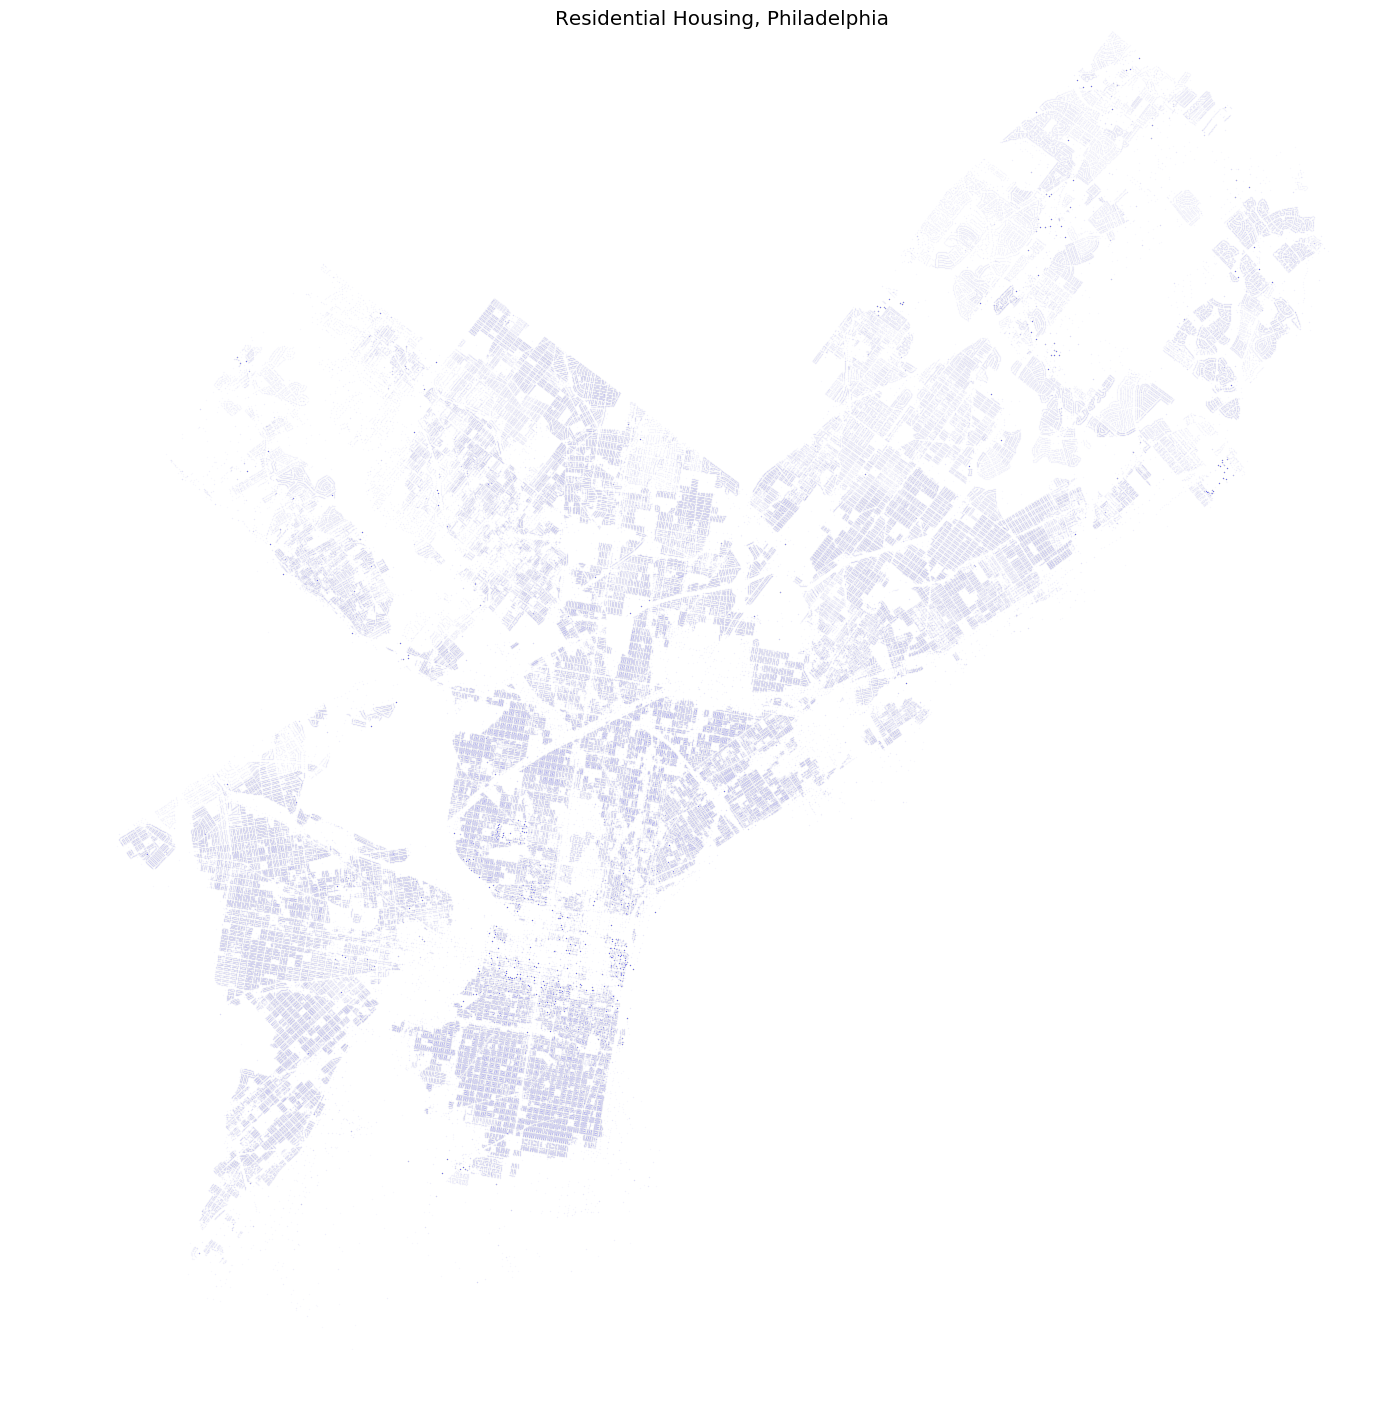

In [7]:
plt.scatter(px, py, s=.6, alpha=0.03)
plt.axis('equal')
plt.axis('off')
plt.xlim(px.min(), px.max())
plt.ylim(py.min(), py.max())
plt.title("Residential Housing, Philadelphia")